## Clustering



We have n data points, and we want to group them in groups.  Data points in each group are very similar to one another.

If x and y are in the same cluster, and x and z are in different clusters, then x is more similar to y than to z.

Dataset: https://umdrive.memphis.edu/vphan/public/datasets/iris.csv 



In [1]:
import pandas, seaborn, matplotlib
df = pandas.read_csv('datasets/iris.csv')
df.columns


Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')

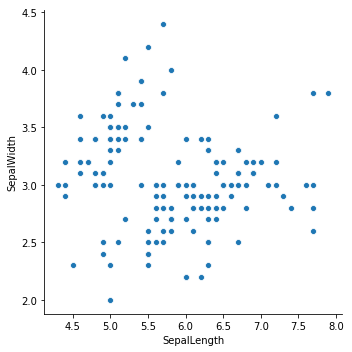

In [2]:
seaborn.relplot(x='SepalLength', y='SepalWidth', data=df)

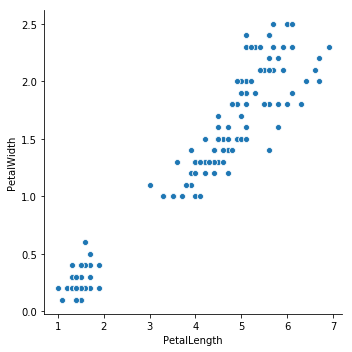

In [3]:
seaborn.relplot(x='PetalLength', y='PetalWidth', data=df)


## Clustering evaluation

- Cohesion: how tight is a cluster.
- Separation: how far are clusters from each other.

For a point i in our dataset, 
- b(i) is the average distance between point i and the closest cluster.
- a(i) is the average distance between point i and points in its cluster.

$s(i) = {b(i) - a(i) \over max( b(i), a(i) )}$

The silloutte measure of a clustering is ${ \sum_i s(i) \over n }$


## Popular clustering methods

- KMeans
    - Mini-batch Kmeans
- Hierarchical clustering

## Scikitlearn and Pandas

This is a very popular Python machine-learning library.



In [4]:
import pandas
from sklearn.cluster import KMeans
from seaborn import lmplot
df = pandas.read_csv('datasets/iris.csv')


In [5]:
# clustering result on 2 attributes sepal length and width:

X2 = df[ ['SepalLength', 'SepalWidth'] ]
model2 = KMeans(n_clusters=3)
model2.fit(X2)
df['kmeans2'] = model2.labels_

In [6]:
X4 = df[ ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', ] ]
model4 = KMeans(n_clusters=3)
model4.fit(X4)
df['kmeans4'] = model4.labels_



In [7]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,kmeans2,kmeans4
0,5.1,3.5,1.4,0.2,setosa,0,1
1,4.9,3.0,1.4,0.2,setosa,0,1
2,4.7,3.2,1.3,0.2,setosa,0,1
3,4.6,3.1,1.5,0.2,setosa,0,1
4,5.0,3.6,1.4,0.2,setosa,0,1


In [8]:
from sklearn import metrics
metrics.silhouette_score(X2, model2.labels_, metric='euclidean')

0.4450525692083638

In [9]:
metrics.silhouette_score(X4, model4.labels_, metric='euclidean')

0.5528190123564102

In [10]:
metrics.adjusted_rand_score(model4.labels_, df.Species)

0.7302382722834697

In [11]:
metrics.adjusted_rand_score(model2.labels_, df.Species)

0.6006861021484542

In [12]:
from sklearn.cluster import MiniBatchKMeans

model_x = MiniBatchKMeans(n_clusters=2)
model_x.fit(X4)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=2,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [13]:
model_x.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [14]:
metrics.adjusted_rand_score(model_x.labels_, df.Species)
metrics.silhouette_score(X4, model_x.labels_, metric='euclidean')

0.6810461692117465

In [15]:
df['minibatch'] = model_x.labels_

In [16]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,kmeans2,kmeans4,minibatch
0,5.1,3.5,1.4,0.2,setosa,0,1,0
1,4.9,3.0,1.4,0.2,setosa,0,1,0
2,4.7,3.2,1.3,0.2,setosa,0,1,0
3,4.6,3.1,1.5,0.2,setosa,0,1,0
4,5.0,3.6,1.4,0.2,setosa,0,1,0


In [17]:
model_x.predict([ [5.1,3.6,1.3,0.25]  ])

array([0], dtype=int32)

In [18]:
df.sample()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,kmeans2,kmeans4,minibatch
21,5.1,3.7,1.5,0.4,setosa,0,1,0


In [19]:
model_x.predict([ [5.1,3.6,1.3,0.25], [4.7,3.5,1.5,0.35]  ])

array([0, 0], dtype=int32)

In [20]:
df.sample()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,kmeans2,kmeans4,minibatch
80,5.5,2.4,3.8,1.1,versicolor,2,2,1


In [21]:
model_x.predict([ [5.1,3.6,1.3,0.25], [4.7,3.5,1.5,0.35], [6.5,2.5,5.5,2.2]  ])

array([0, 0, 1], dtype=int32)

In [22]:
model_x.inertia_

152.48011048549324